# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus componentes principales, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [15]:
df = pd.read_csv('C:\\Users\\horta\\Documents\\Nueva carpeta\\Data_Analyst\\Machine_Learning\\2-No_Supervisado\\1-PCA\\Practica\\data\\nndb_flat.csv')

print(df.head())
print(df.dtypes)


     ID               FoodGroup              ShortDescrip   
0  1001  Dairy and Egg Products          BUTTER,WITH SALT  \
1  1002  Dairy and Egg Products  BUTTER,WHIPPED,WITH SALT   
2  1003  Dairy and Egg Products      BUTTER OIL,ANHYDROUS   
3  1004  Dairy and Egg Products               CHEESE,BLUE   
4  1005  Dairy and Egg Products              CHEESE,BRICK   

                      Descrip CommonName MfgName ScientificName  Energy_kcal   
0              Butter, salted        NaN     NaN            NaN        717.0  \
1  Butter, whipped, with salt        NaN     NaN            NaN        717.0   
2       Butter oil, anhydrous        NaN     NaN            NaN        876.0   
3                Cheese, blue        NaN     NaN            NaN        353.0   
4               Cheese, brick        NaN     NaN            NaN        371.0   

   Protein_g  Fat_g  ...  Folate_USRDA  Niacin_USRDA  Riboflavin_USRDA   
0       0.85  81.11  ...        0.0075      0.002625          0.026154  \
1   

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [21]:
df_numerico = df.select_dtypes(include=[np.number])

correlaciones = df_numerico.corr()

print(correlaciones)


                        ID  Energy_kcal  Protein_g     Fat_g    Carb_g   
ID                1.000000     0.126126   0.075538 -0.011996  0.177297  \
Energy_kcal       0.126126     1.000000   0.110302  0.806795  0.487096   
Protein_g         0.075538     0.110302   1.000000  0.054715 -0.301974   
Fat_g            -0.011996     0.806795   0.054715  1.000000 -0.054116   
Carb_g            0.177297     0.487096  -0.301974 -0.054116  1.000000   
Sugar_g           0.082710     0.313151  -0.266170 -0.001962  0.615344   
Fiber_g           0.008252     0.197338  -0.072777 -0.028842  0.458192   
VitA_mcg         -0.031211     0.026329   0.026483  0.024379  0.001871   
VitB6_mg         -0.060463     0.121872   0.228485 -0.046950  0.195571   
VitB12_mcg        0.016512    -0.012292   0.245423 -0.020786 -0.094636   
VitC_mg          -0.020974    -0.033495  -0.066456 -0.059993  0.076745   
VitE_mg          -0.056898     0.303701  -0.029481  0.338008  0.070298   
Folate_mcg       -0.051166     0.14593

### Variables no numéricas
Elimina las variables de texto del dataset

In [27]:
df.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [28]:
df_numerico = df.select_dtypes(include=[np.number])


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables
Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

Podemos realizar una transformación Logarítmica

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema (indeterminación, infinito).

(df = df + 1)

In [29]:
df_numerico = df_numerico + 1
df_transformado = np.log(df_numerico)


### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [37]:
from sklearn.preprocessing import StandardScaler
df_log_transformed = np.log1p(df_numerico)

scaler = StandardScaler()

scaler.fit(df_log_transformed)

df_scaled = scaler.transform(df_log_transformed)

df_scaled = pd.DataFrame(df_scaled, columns=df_log_transformed.columns)


### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [38]:
from sklearn.decomposition import PCA

pca = PCA()

df_pca = pca.fit_transform(df_estandarizado)



### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

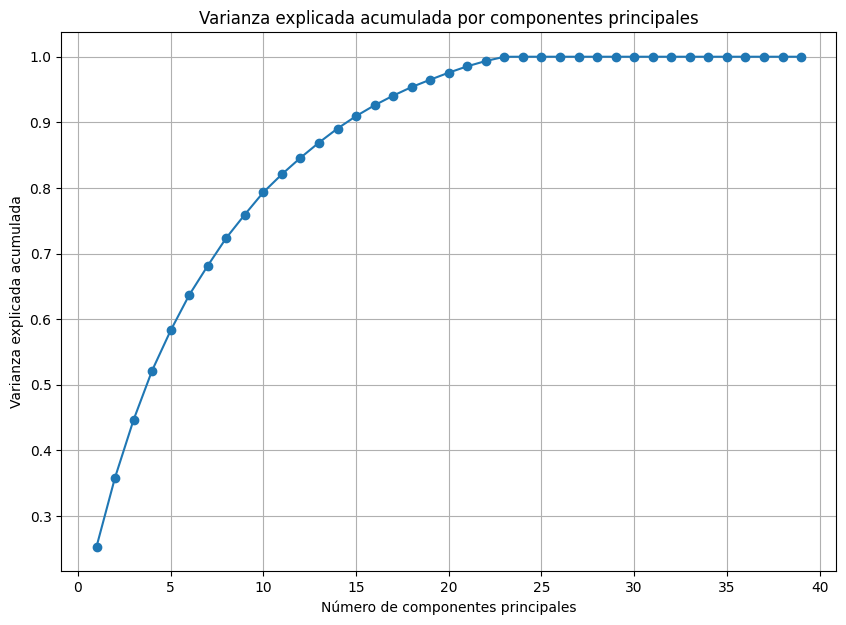

In [39]:
import numpy as np
import matplotlib.pyplot as plt

var_explicada = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(var_explicada)+1), var_explicada, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por componentes principales')
plt.grid(True)
plt.show()


## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [40]:
pca_9 = PCA(n_components=9)

df_pca_9 = pca_9.fit_transform(df_scaled)

df_pca_9 = pd.DataFrame(df_pca_9, columns=[f'PC{i}' for i in range(1, 10)]

### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [41]:
df_pca_9['FoodGroup'] = df['FoodGroup']

for i in range(1, 10):  
    print(f"Principal Component {i}")
    top_food_groups = df_pca_9.groupby('FoodGroup')[f'PC{i}'].mean().sort_values(ascending=False).head(3)
    print(top_food_groups)
    print("\n")


Principal Component 1
FoodGroup
Breakfast Cereals        6.375451
Nut and Seed Products    3.831475
Spices and Herbs         3.498204
Name: PC1, dtype: float64


Principal Component 2
FoodGroup
Spices and Herbs         4.345844
Breakfast Cereals        3.033544
Nut and Seed Products    2.054151
Name: PC2, dtype: float64


Principal Component 3
FoodGroup
Breakfast Cereals          1.843610
Beverages                  1.287977
Fruits and Fruit Juices    0.957849
Name: PC3, dtype: float64


Principal Component 4
FoodGroup
Spices and Herbs                  2.293810
Dairy and Egg Products            1.713429
Finfish and Shellfish Products    1.423917
Name: PC4, dtype: float64


Principal Component 5
FoodGroup
Fats and Oils            4.982077
Nut and Seed Products    0.835674
Snacks                   0.822082
Name: PC5, dtype: float64


Principal Component 6
FoodGroup
Nut and Seed Products    0.948463
Baked Products           0.830070
Sweets                   0.789766
Name: PC6, dtype: float